Importação das bibliotecas necessárias

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10 
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #carregamento base de dados

x_train, x_test = x_train / 255.0, x_test / 255.0 #normaliznado em 0 até 1
y_train, y_test = y_train.flatten(), y_test.flatten() #deixando em um vetor

print(x_train.shape,  y_train.shape) 

(50000, 32, 32, 3) (50000,)


Quantas classes tem dentro do dataset

In [3]:
K = len(set(y_train))
K

10

In [4]:
i = Input(shape=x_train[0].shape) #camada de entrada

x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(i) #primeira convolução
x = BatchNormalization()(x)#normalizar os dados

x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(x)
x = BatchNormalization()(x)#normalizar os dados
x = MaxPooling2D(2,2)(x) #diminuir dimensão da imagem

x = Conv2D(64, (3, 3),  activation='relu', padding='same')(x) #segunda
x = BatchNormalization()(x) #normalizar os dados

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x) 
x = BatchNormalization()(x)#normalizar os dados
x = MaxPooling2D(2,2)(x) #diminuir dimensão da imagem

x = Conv2D(128, (3, 3),  activation='relu', padding='same')(x) #terceira
x = BatchNormalization()(x) #normalizar os dados

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x) 
x = BatchNormalization()(x) #normalizar os dados
x = MaxPooling2D(2,2)(x) #diminuir dimensão da imagem



x = Flatten()(x) #deixando em apenas um vetor para a camada densa
 
x = Dropout(0.2)(x) #dropout para evitar overffiting
x = Dense(1024, activation='relu')(x) #camadad densa
x = Dropout(0.2)(x) #denovo, evitando overfitting

x = Dense(K, activation='softmax')(x) #camada de saída

model = Model(i, x)

Compilação e treinamento da rede neural

In [5]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.3845 - loss: 1.7104 - val_accuracy: 0.5285 - val_loss: 1.3233
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5650 - loss: 1.2331 - val_accuracy: 0.5597 - val_loss: 1.2348
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6279 - loss: 1.0616 - val_accuracy: 0.5996 - val_loss: 1.1220
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6717 - loss: 0.9276 - val_accuracy: 0.6195 - val_loss: 1.1630
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7048 - loss: 0.8433 - val_accuracy: 0.6502 - val_loss: 1.0251


Retreinando para lidar com o aumento de dados

Utilização do Data Augmentation para gerar novas imagens com bases nas imagens já existentes

In [6]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
                                                           horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), epochs=5)


Epoch 1/5
   3/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7257 - loss: 0.9168 

D:\Anaconda\envs\tf-gpu\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6409 - loss: 1.0232 - val_accuracy: 0.6752 - val_loss: 0.9222
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6667 - loss: 0.9646 - val_accuracy: 0.6333 - val_loss: 1.0870
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6711 - loss: 0.9407 - val_accuracy: 0.6757 - val_loss: 0.9428
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6817 - loss: 0.9155 - val_accuracy: 0.6800 - val_loss: 0.9315
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6911 - loss: 0.8878 - val_accuracy: 0.6855 - val_loss: 0.9118


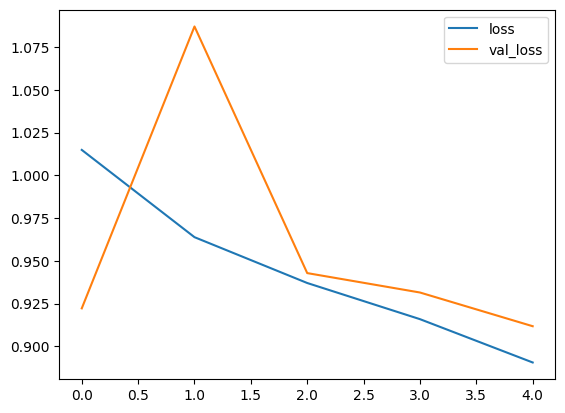

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

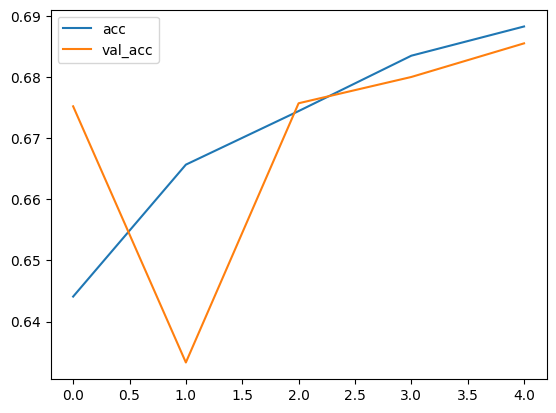

In [8]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
confusion matrix, without normalization
[[713  34  89   7  12   0  18  10  64  53]
 [ 11 848   3   2   1   4   8   2  21 100]
 [ 50   9 628  36  68  19 128  30  13  19]
 [ 20  27 108 441  74  70 151  56  16  37]
 [ 24  10  85  29 595   7 142  92  11   5]
 [ 15  10 107 189  72 408  96  78  15  10]
 [  7  14  35  23  17   8 874   7   4  11]
 [ 19   6  49  35  39  31  27 770   1  23]
 [ 73  61  20   3  10   3   5   2 785  38]
 [ 34 114   6   6   1   2  11  15  18 793]]


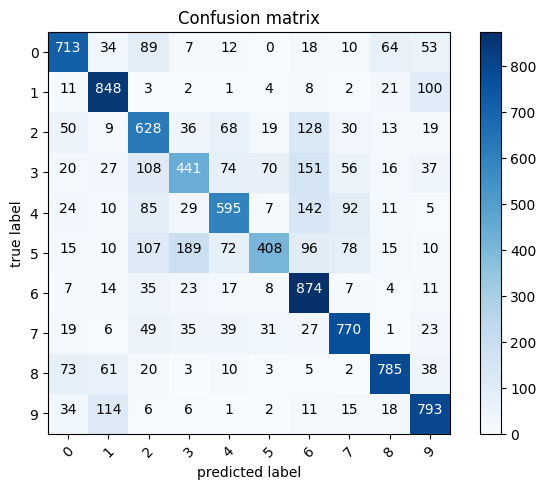

In [9]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("normalized confusion matrix")
  else:
      print('confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('true label')
  plt.xlabel('predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 16, 16, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 2, 2, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 2, 2, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 2, 2, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,291,648 (4.93 MB)

 Trainable params: 430,250 (1.64 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 860,502 (3.28 MB)

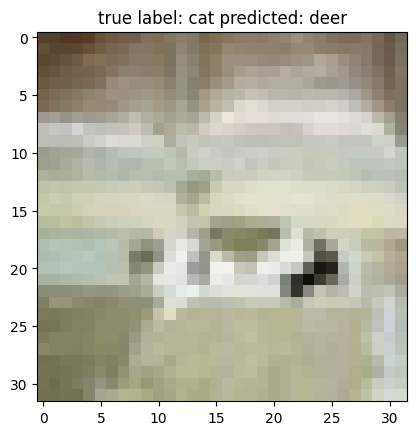

In [12]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("true label: %s predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

model.summary()